# Carregamento dos dados

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('datasets/heart-disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Análise dos dados

In [17]:
# Pair plot
# sns.pairplot(df, hue='target')


<Axes: >

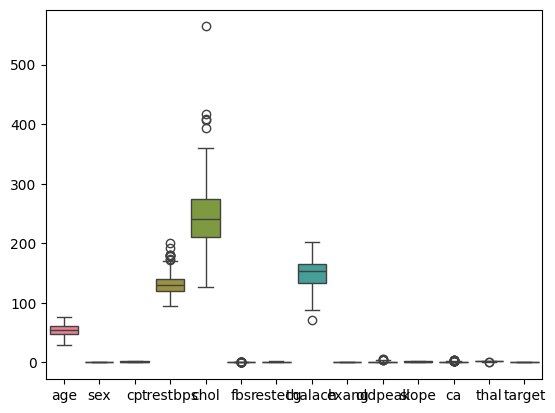

In [18]:
# Box
sns.boxplot(df)

<Axes: >

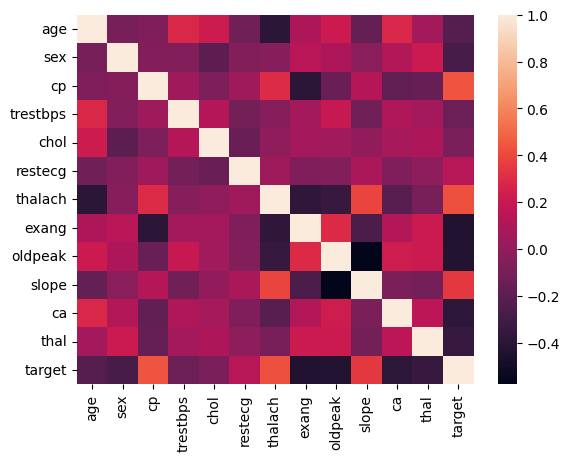

In [19]:
corr = df.drop(columns="fbs").corr()
sns.heatmap(corr)

# Pré-processamento

C:\Users\thiag\AppData\Local\Temp\ipykernel_12012\2187219603.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '27.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_.loc[df_[column] < low_lim, column] = low_lim
C:\Users\thiag\AppData\Local\Temp\ipykernel_12012\2187219603.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_.loc[df_[column] < low_lim, column] = low_lim
C:\Users\thiag\AppData\Local\Temp\ipykernel_12012\2187219603.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '115.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_.loc[df_[column] < l

<Axes: >

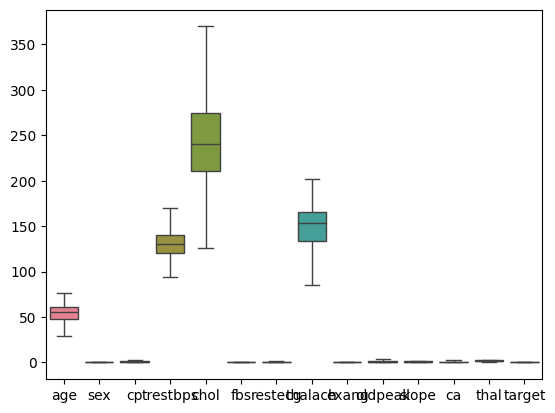

In [20]:
# Tratar outlier pela regra do 1.5*IQR (variação interquartil)

def remove_outliers(df, columns):
    df_ = df.copy() 

    for column in columns:
        q1 = df_[column].quantile(0.25)  # primeiro quartil
        q3 = df_[column].quantile(0.75)  # terceiro quartil
        iqr = q3 - q1

        low_lim = q1 - 1.5 * iqr
        high_lim = q3 + 1.5 * iqr

        # Substitui valores menores que o limite inferior pelo limite inferior
        df_.loc[df_[column] < low_lim, column] = low_lim 
        
        # Substitui valores maiores que o limite superior pelo limite superior
        df_.loc[df_[column] > high_lim, column] = high_lim
        
    return df_

df = remove_outliers(df, df.columns)
sns.boxplot(df)

C:\Users\thiag\AppData\Local\Temp\ipykernel_12012\3648769434.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.97312292  1.00257707  0.03203122  0.03203122 -0.93851463 -0.93851463
  0.03203122  0.03203122  1.00257707  1.00257707 -0.93851463  1.00257707
  0.03203122  1.97312292  1.97312292  1.00257707  1.00257707  1.97312292
 -0.93851463  1.97312292 -0.93851463  1.00257707 -0.93851463  1.00257707
  1.97312292  0.03203122  1.00257707  1.00257707  1.00257707  1.00257707
  0.03203122 -0.93851463  0.03203122  1.00257707  1.97312292  1.00257707
  1.00257707  1.00257707  1.00257707  1.00257707  1.00257707  0.03203122
 -0.93851463 -0.93851463  1.00257707  0.03203122  1.00257707  1.00257707
  1.00257707 -0.93851463  1.00257707 -0.93851463  1.00257707  1.00257707
  1.00257707  0.03203122 -0.93851463 -0.93851463  1.97312292 -0.93851463
  1.00257707  0.03203122  1.97312292  0.03203122  1.00257707 -0.93851463
  1.00257707

<Axes: >

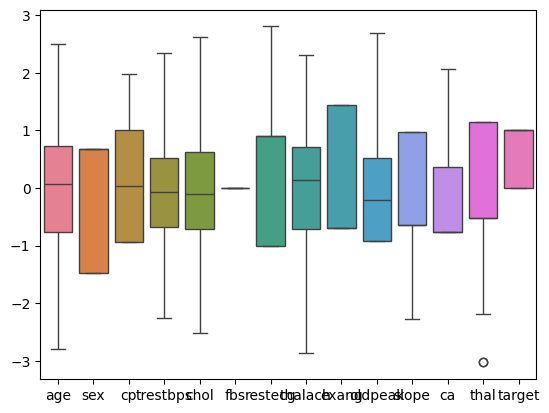

In [21]:
from sklearn.preprocessing import StandardScaler

df.iloc[:, :-1] = StandardScaler().fit_transform(df.iloc[:, :-1])

sns.boxplot(df)

<Axes: >

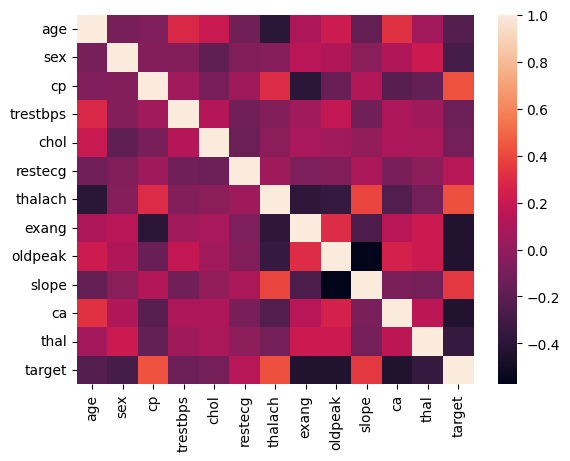

In [22]:
corr = df.drop(columns="fbs").corr()
sns.heatmap(corr)

In [23]:
X = df.drop(columns=['fbs', 'trestbps', 'target']).iloc[:300]
y = df.loc[:, ['target']].iloc[:300]
print(X.shape, y.shape)

(300, 11) (300, 1)


# Treinamento

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size=0.3)

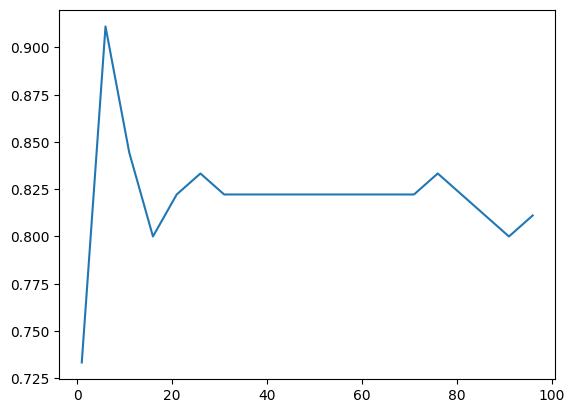

In [25]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from knn import KNN

acc_array = []
K = range(1, 101, 5)

for k in K:
    classifier = KNN(k)
    classifier.fit(X_train, y_train)

    pred = [classifier.predict(x) for x in X_test]
    acc = accuracy_score(y_test, pred)
    acc_array.append(acc)

plt.plot(K, acc_array)
plt.show()


In [26]:
from knn import KNN

classifier_1 = KNN(7)
classifier_1.fit(X_train, y_train)

In [27]:
pred_1 = [classifier_1.predict(x) for x in X_test]

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, r2_score

print("Acurácia:", accuracy_score(y_test, pred_1))
print("Precisão:", precision_score(y_test, pred_1))
print("Recall:", recall_score(y_test, pred_1))
print("f1:", f1_score(y_test, pred_1))
print("r2:", r2_score(y_test, pred_1))
print("Matrix de confusão:\n", confusion_matrix(y_test.reshape((-1, 1)), np.array(pred_1).reshape((-1, 1))))

Acurácia: 0.8222222222222222
Precisão: 0.7678571428571429
Recall: 0.9347826086956522
f1: 0.8431372549019608
r2: 0.2885375494071144
Matrix de confusão:
 [[31 13]
 [ 3 43]]


# Comparativo

In [29]:
from sklearn.neighbors import KNeighborsClassifier

classifier_2 = KNeighborsClassifier(n_neighbors=7)
classifier_2.fit(X_train, y_train.flatten())
classifier_2.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 7,
 'p': 2,
 'weights': 'uniform'}

In [30]:
pred_2 = classifier_2.predict(X_test)
print("Acurácia:", accuracy_score(y_test, pred_2))
print("Precisão:", precision_score(y_test, pred_2))
print("Recall:", recall_score(y_test, pred_2))
print("f1:", f1_score(y_test, pred_2))
print("r2:", r2_score(y_test, pred_2))
print("Matrix de confusão:\n", confusion_matrix(y_test.reshape((-1, 1)), np.array(pred_2).reshape((-1, 1))))

Acurácia: 0.8222222222222222
Precisão: 0.7678571428571429
Recall: 0.9347826086956522
f1: 0.8431372549019608
r2: 0.2885375494071144
Matrix de confusão:
 [[31 13]
 [ 3 43]]
